In [1]:
#Data= https://www.kaggle.com/code/manchunhui/wdi-dataset-preliminary-eda/notebook
#path= './mini-project/WDIData_T.csv'

<h1 style = 'font-size: 2.5em ; color:#008B8B ; font-family: lato; text-align: center'>
    World Development Indicators</h1>
<p style = 'font-size: 1.5em ; color: #008B8B ; font-family: lato; text-align: center'>
    Source: World Bank via Kaggle
    </p>
<p style = 'font-size: 1.3 em; color:#008B8B ; font-family: lato ; text-align: center'>
    UCSD Week 6 Project
    Zahra Karimi 

</p>


<h2 style = "font-size: 2em ; color: #045F5F" > Data Exploration</h2>

In [22]:
#importing all necessary libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import random 
import folium 

In [8]:
data = pd.read_csv('./WDIData_T.csv')
print(data.shape)

(7578806, 6)


In [9]:
type(data)

pandas.core.frame.DataFrame

In [12]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


The dataset has **7578806** rows and **6** columns. The dataset includes different indicators for different countries with the year and value of the indicator.

In [27]:
#How many missing values do we have?
data.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [28]:
#what is the data type of each column?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7578806 entries, 0 to 7578805
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 346.9+ MB


In [15]:
#How many countries do we have?
countries = data['CountryName'].unique().tolist()
len(countries)

263

In [17]:
# Are there same number of country codes?
countrycodes = data['CountryCode'].unique().tolist()
len(countrycodes)

263

In [34]:
#How many unique indicators do we have?
indicators = data['IndicatorName'].unique().tolist()
len(indicators)


1437

In [20]:
#How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

61

In [21]:
#what is the range of years?
print(min(years) , " to ", max(years))

1960  to  2020


<h2 style = "font-size: 2em ; color: #045F5F" > Research Question</h2>

Is there a relationship between Labor force participation and GDP per capita in Japan?

In [57]:
mask1 = data['CountryName'].str.contains('Japan')
mask2 = data['IndicatorName'].str.contains('Labor force participation rate, total \(% of total population ages 15\+\) \(national estimate\)')

labor_force = data[mask1 & mask2]

In [60]:
labor_force.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
21785,Japan,JPN,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,1960,69.199997
62040,Japan,JPN,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,1961,69.099998
105333,Japan,JPN,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,1962,68.300003
149555,Japan,JPN,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,1963,67.099998
193962,Japan,JPN,"Labor force participation rate, total (% of to...",SL.TLF.CACT.NE.ZS,1964,66.099998


Figure 1. Labor Force participation indicator of Japan Bar chart 

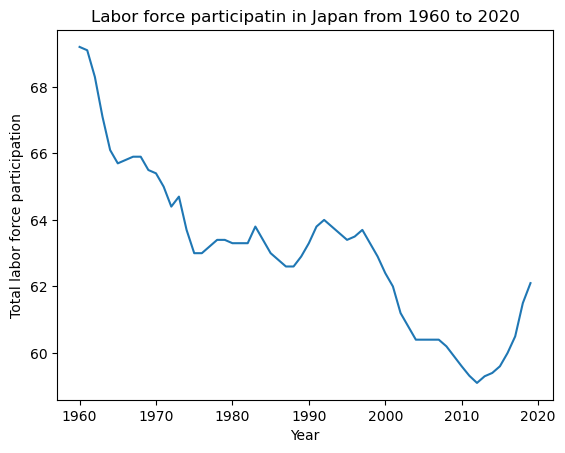

In [64]:
#switch to a line plot 
plt.plot(labor_force ['Year'].values , labor_force['Value'])

#label the axes
plt.xlabel('Year')
plt.ylabel ('Total labor force participation')

#label the figure
plt.title("Labor force participatin in Japan from 1960 to 2020")

#adding annotations
#for y,x in zip(labor_force['Value'].values, labor_force['Year'].values):
    #plt.annotate(f'{int(y)}\n', xycoords = 'data', xy = (x,y), ha="center", va="center")
    
plt.show()

In [69]:
#Finding the minimum and maximum of labor participation 
min_labor = labor_force['Value'].max()
max_labor = labor_force['Value']. min()

#Finding the corresponding year 
year_of_max = labor_force.loc[labor_force['Value'].idxmax()]['Year']
year_of_min = labor_force.loc[labor_force['Value'].idxmin()]['Year']

print("Maximum Labor Force Participation Rate: ", max_labor,"in year", year_of_max)
print("Minimum Labor Force Participation Rate: ", min_labor, "in year", year_of_min)


Maximum Labor Force Participation Rate:  59.0999984741211 in year 1960
Minimum Labor Force Participation Rate:  69.1999969482422 in year 2012


**GDP per capita**

In [71]:
mask1 = data['CountryName'].str.contains('Japan')
mask2 = data['IndicatorName'].str.contains('GDP per capita \(constant 2010 US\$\)')

GDP_per_capita = data[mask1 & mask2]

In [73]:
GDP_per_capita.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
21772,Japan,JPN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1960,8607.657082
62027,Japan,JPN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1961,9396.221214
105318,Japan,JPN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1962,10138.397014
149540,Japan,JPN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1963,10886.164111
193947,Japan,JPN,GDP per capita (constant 2010 US$),NY.GDP.PCAP.KD,1964,12031.295048


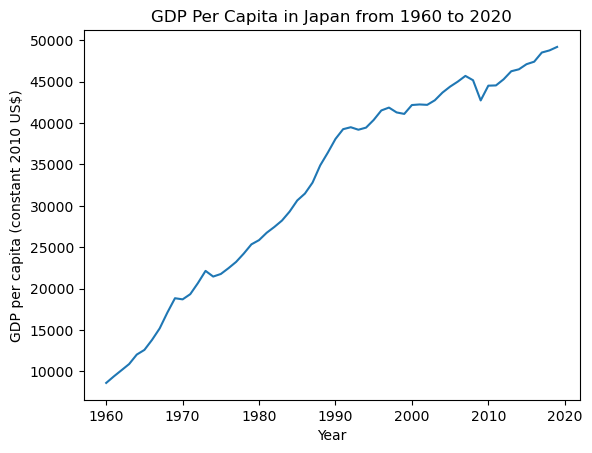

In [74]:
#switch to a line plot 
plt.plot(GDP_per_capita['Year'].values , GDP_per_capita['Value'])

#label the axes
plt.xlabel('Year')
plt.ylabel (GDP_per_capita['IndicatorName'].iloc[0])

#label the figure
plt.title("GDP Per Capita in Japan from 1960 to 2020")

#adding annotations
#for y,x in zip(labor_force['Value'].values, labor_force['Year'].values):
    #plt.annotate(f'{int(y)}\n', xycoords = 'data', xy = (x,y), ha="center", va="center")
    
plt.show()

### ScatterPlot for comparing GDP against Labor Force Participation 

First, we'll need to make sure we're looking at the same time frames

In [75]:
print("GDP Min Year = ", GDP_per_capita['Year'].min(), "max: ", GDP_per_capita['Year'].max())
print("Labor Force Min Year = ", labor_force['Year'].min(), "max: ", labor_force['Year'].max())

GDP Min Year =  1960 max:  2019
Labor Force Min Year =  1960 max:  2019


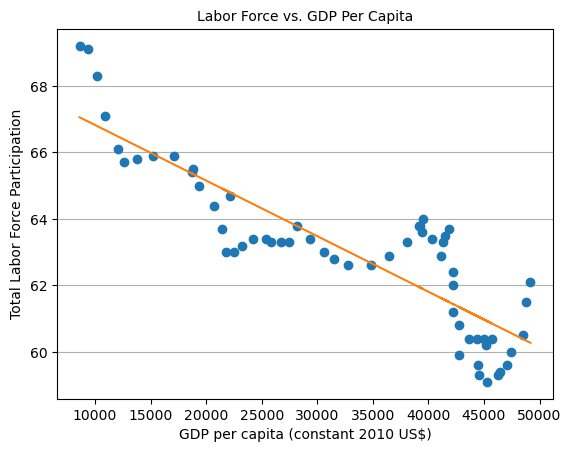

In [80]:
%matplotlib inline
fig, axis =plt.subplots()
#Grid lines, Xlable, Ylabel 

axis.yaxis.grid(True)
axis.set_title('Labor Force vs. GDP Per Capita' , fontsize = 10)
axis.set_xlabel(GDP_per_capita['IndicatorName'].iloc[0], fontsize = 10)
axis.set_ylabel('Total Labor Force Participation' , fontsize = 10)

x = GDP_per_capita['Value']
y = labor_force ['Value']

plt.plot(x,y, 'o')
m,b = np.polyfit(x,y,1)
plt.plot(x,m*x+b)


plt.show()

In [79]:
#estimating the correlation
np.corrcoef(GDP_per_capita['Value'], labor_force['Value'])

array([[ 1.        , -0.86906078],
       [-0.86906078,  1.        ]])